In [1]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding
from sklearn.cluster import SpectralClustering, KMeans
from scipy.sparse import linalg, eye
from pyamg import smoothed_aggregation_solver
from sklearn import neighbors
from sklearn.neighbors import kneighbors_graph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
import glob
import PIL.Image as pilimg
from sklearn.preprocessing import LabelEncoder
from scipy import io
from sklearn.metrics.cluster import normalized_mutual_info_score
encoder = LabelEncoder()

In [2]:
mat_file = io.loadmat('Yale_32x32.mat')

In [3]:
label=mat_file['Y']

In [4]:
X=mat_file["X"]

In [380]:
i=0

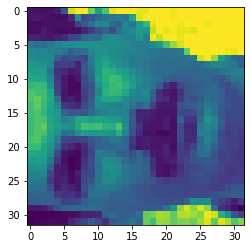

In [396]:
i+=1
plt.imshow(X[i].reshape(32,32))

In [382]:
X_res

array([[ 78,  76,  74, ..., 170, 174, 160],
       [234, 234, 234, ..., 217, 220, 219],
       [234, 234, 234, ..., 222, 223, 222],
       ...,
       [234, 234, 234, ...,  43,  42,  42],
       [234, 234, 234, ..., 211, 208, 192],
       [234, 234, 234, ..., 223, 223, 223]], dtype=uint8)

In [5]:
StdScaler = StandardScaler()
X_std = StdScaler.fit_transform(X)

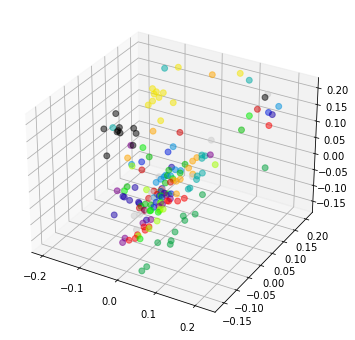

In [401]:
lle = LocallyLinearEmbedding(n_components=3, n_neighbors=70, random_state=23)
lle.fit(X_std)
X_lle_compression = lle.transform(X_std)   # X_res, X_std

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(X_lle_compression[:, 0], X_lle_compression[:, 1], X_lle_compression[:, 1],
            alpha=0.5, c=label, cmap="nipy_spectral",s=35)
plt.grid(True)
fig.set_size_inches(17,6)

plt.show()

In [6]:
ncom=100
lle4 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=10, random_state=23)
lle6 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=30, random_state=23)
lle8 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=50, random_state=23)
lle10 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=70, random_state=23)
lle12 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=90, random_state=23)
lle14 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=110, random_state=23)
lle16 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=130, random_state=23)
lle18 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=150, random_state=23)


X_lle4 = lle4.fit_transform(X_std)
X_lle6 = lle6.fit_transform(X_std)
X_lle8 = lle8.fit_transform(X_std)
X_lle10 = lle10.fit_transform(X_std)
X_lle12 = lle12.fit_transform(X_std)
X_lle14 = lle14.fit_transform(X_std)
X_lle16 = lle16.fit_transform(X_std)
X_lle18 = lle16.fit_transform(X_std)

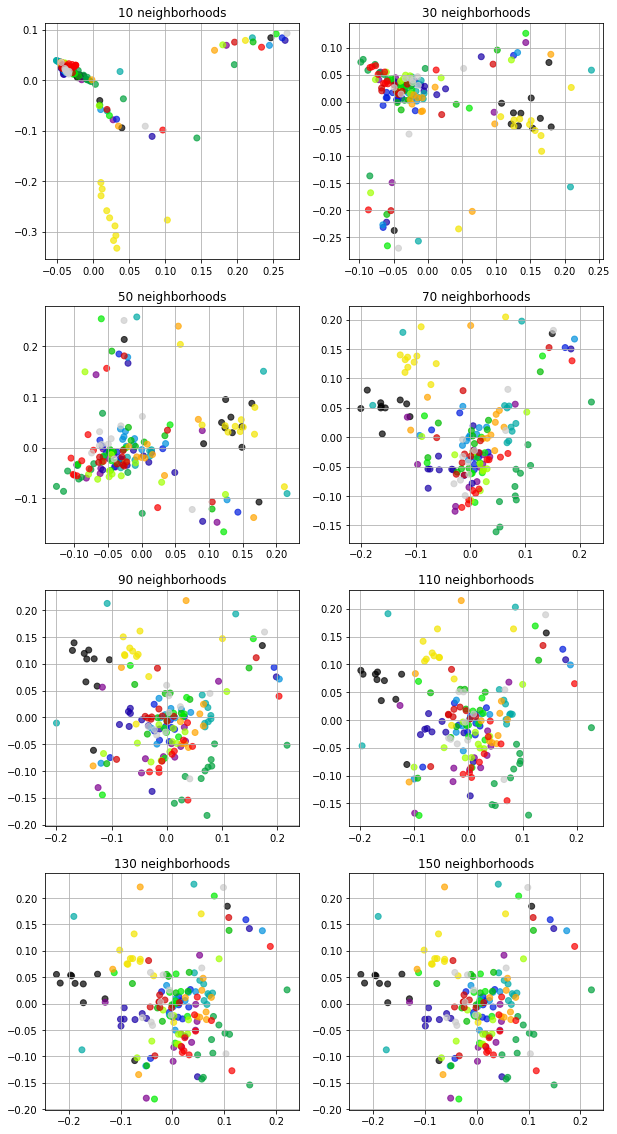

In [7]:
plt.figure(figsize=(10,20))

plt.subplot(4,2,1)
plt.title('10 neighborhoods')
plt.scatter(X_lle4[:, 0], X_lle4[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,2)
plt.title('30 neighborhoods')
plt.scatter(X_lle6[:, 0], X_lle6[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,3)
plt.title('50 neighborhoods')
plt.scatter(X_lle8[:, 0], X_lle8[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,4)
plt.title('70 neighborhoods')
plt.scatter(X_lle10[:, 0], X_lle10[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,5)
plt.title('90 neighborhoods')
plt.scatter(X_lle12[:, 0], X_lle12[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,6)
plt.title('110 neighborhoods')
plt.scatter(X_lle14[:, 0], X_lle14[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,7)
plt.title('130 neighborhoods')
plt.scatter(X_lle16[:, 0], X_lle16[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,8)
plt.title('150 neighborhoods')
plt.scatter(X_lle18[:, 0], X_lle18[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)
plt.savefig("n_neighbor_LLE(face).png",dpi=400)
plt.show()

In [ ]:
label = label.squeeze()

In [47]:
ncom=150
lle4 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=10, random_state=23)
lle6 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=30, random_state=23)
lle8 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=50, random_state=23)
lle10 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=70, random_state=23)
lle12 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=90, random_state=23)
lle14 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=110, random_state=23)
lle16 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=130, random_state=23)
lle18 = LocallyLinearEmbedding(n_components=ncom, n_neighbors=150, random_state=23)


X_lle4 = lle4.fit_transform(X_std)
X_lle6 = lle6.fit_transform(X_std)
X_lle8 = lle8.fit_transform(X_std)
X_lle10 = lle10.fit_transform(X_std)
X_lle12 = lle12.fit_transform(X_std)
X_lle14 = lle14.fit_transform(X_std)
X_lle16 = lle16.fit_transform(X_std)
X_lle18 = lle16.fit_transform(X_std)

In [48]:
knn = KMeans(n_clusters=15, n_init=100, max_iter=300, tol=0.0001)
lle4pred = knn.fit_predict(X_lle4)
lle6pred = knn.fit_predict(X_lle6)
lle8pred = knn.fit_predict(X_lle8)
lle10pred = knn.fit_predict(X_lle10)
lle12pred = knn.fit_predict(X_lle12)
lle14pred = knn.fit_predict(X_lle14)
lle16pred = knn.fit_predict(X_lle16)
lle18pred = knn.fit_predict(X_lle18)

In [49]:
lletable=[normalized_mutual_info_score(label,lle4pred),
        normalized_mutual_info_score(label,lle6pred),
        normalized_mutual_info_score(label,lle8pred),
        normalized_mutual_info_score(label,lle10pred),
        normalized_mutual_info_score(label,lle12pred),
        normalized_mutual_info_score(label,lle14pred),
        normalized_mutual_info_score(label,lle16pred),
        normalized_mutual_info_score(label,lle18pred)]

LLEtable["150"]=pd.Series(lletable)
LLEtable

,50,75,100,125,150
0,0.402234,0.317780,0.321940,0.331883,0.171589
1,0.454609,0.373128,0.333272,0.245311,0.174574
2,0.449004,0.367777,0.299682,0.229662,0.169117
3,0.386183,0.364053,0.282150,0.182670,0.167447
4,0.484117,0.313438,0.282442,0.254498,0.206340
5,0.381891,0.417251,0.275073,0.271554,0.172765
6,0.437820,0.360301,0.322792,0.273057,0.206701
7,0.388324,0.386304,0.320278,0.248378,0.212504


In [10]:
print("10  :" ,normalized_mutual_info_score(label,lle4pred) )
print("30  :" ,normalized_mutual_info_score(label,lle6pred) )
print("50  :" ,normalized_mutual_info_score(label,lle8pred) )
print("70  :" ,normalized_mutual_info_score(label,lle10pred) )
print("90  :" ,normalized_mutual_info_score(label,lle12pred) )
print("110 :" ,normalized_mutual_info_score(label,lle14pred) )
print("130 :" ,normalized_mutual_info_score(label,lle16pred) )
print("150 :" ,normalized_mutual_info_score(label,lle18pred) )

10  : 0.3340464530725374
30  : 0.3091444444151081
50  : 0.2822127856368606
70  : 0.30680469406061
90  : 0.29794012624890176
110 : 0.2819838670424473
130 : 0.30463586982129537
150 : 0.3648741195407274


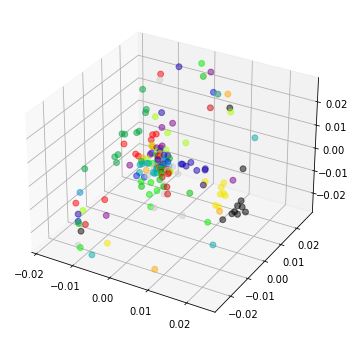

In [418]:
lle = SpectralEmbedding(n_components=3, n_neighbors=100, random_state=23,affinity='nearest_neighbors')
lle.fit(X_std)
X_lle_compression = lle.fit_transform(X_std)   # X_res, X_std

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(X_lle_compression[:, 0], X_lle_compression[:, 1], X_lle_compression[:, 1],
            alpha=0.5, c=label, cmap="nipy_spectral",s=35)
plt.grid(True)
fig.set_size_inches(17,6)

plt.show()

In [11]:
ncom=100

lle4 = SpectralEmbedding(n_components=ncom, n_neighbors=10, random_state=23, affinity="nearest_neighbors")
lle6 = SpectralEmbedding(n_components=ncom, n_neighbors=30, random_state=23, affinity="nearest_neighbors")
lle8 = SpectralEmbedding(n_components=ncom, n_neighbors=50, random_state=23, affinity="nearest_neighbors")
lle10 = SpectralEmbedding(n_components=ncom, n_neighbors=70, random_state=23, affinity="nearest_neighbors")
lle12 = SpectralEmbedding(n_components=ncom, n_neighbors=90, random_state=23, affinity="nearest_neighbors")
lle14 = SpectralEmbedding(n_components=ncom, n_neighbors=110, random_state=23, affinity="nearest_neighbors")
lle16 = SpectralEmbedding(n_components=ncom, n_neighbors=130, random_state=23, affinity="nearest_neighbors")
lle18 = SpectralEmbedding(n_components=ncom, n_neighbors=150, random_state=23, affinity="nearest_neighbors")


X_lle4 = lle4.fit_transform(X_std)
X_lle6 = lle6.fit_transform(X_std)
X_lle8 = lle8.fit_transform(X_std)
X_lle10 = lle10.fit_transform(X_std)
X_lle12 = lle12.fit_transform(X_std)
X_lle14 = lle14.fit_transform(X_std)
X_lle16 = lle16.fit_transform(X_std)
X_lle18 = lle16.fit_transform(X_std)

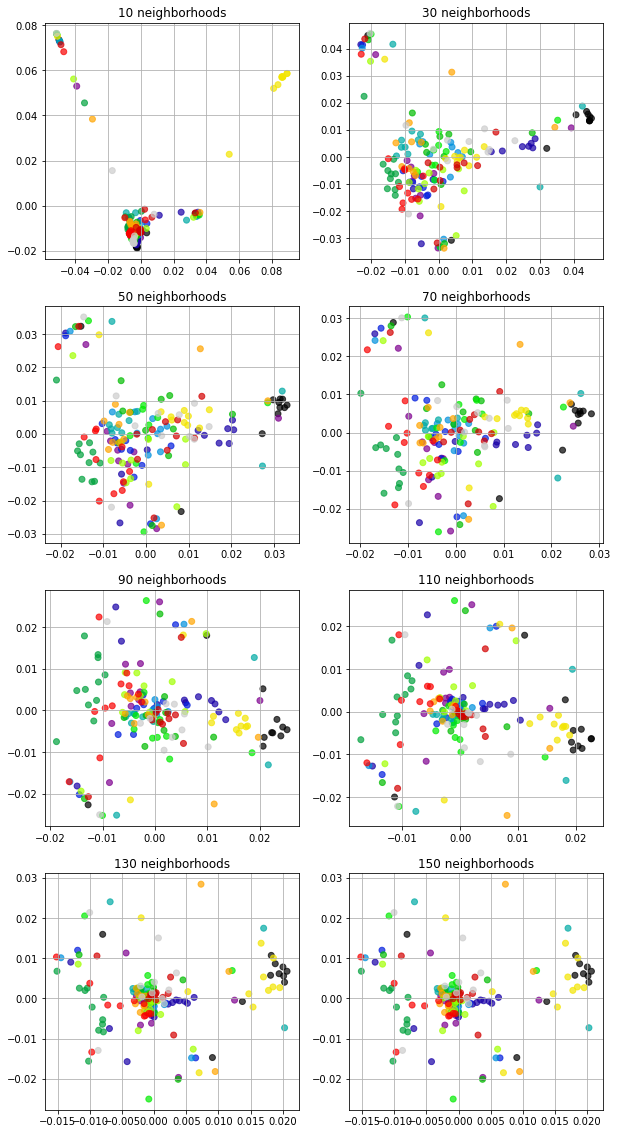

In [11]:
plt.figure(figsize=(10,20))

plt.subplot(4,2,1)
plt.title('10 neighborhoods')
plt.scatter(X_lle4[:, 0], X_lle4[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,2)
plt.title('30 neighborhoods')
plt.scatter(X_lle6[:, 0], X_lle6[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,3)
plt.title('50 neighborhoods')
plt.scatter(X_lle8[:, 0], X_lle8[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,4)
plt.title('70 neighborhoods')
plt.scatter(X_lle10[:, 0], X_lle10[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,5)
plt.title('90 neighborhoods')
plt.scatter(X_lle12[:, 0], X_lle12[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,6)
plt.title('110 neighborhoods')
plt.scatter(X_lle14[:, 0], X_lle14[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,7)
plt.title('130 neighborhoods')
plt.scatter(X_lle16[:, 0], X_lle16[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)

plt.subplot(4,2,8)
plt.title('150 neighborhoods')
plt.scatter(X_lle18[:, 0], X_lle18[:, 1], c=label, cmap="nipy_spectral", alpha=0.7)
plt.grid(True)
plt.savefig("n_neighbor_SE(face).png",dpi=400)
plt.show()

In [66]:
ncom=150

lle4 = SpectralEmbedding(n_components=ncom, n_neighbors=10, random_state=23, affinity="nearest_neighbors")
lle6 = SpectralEmbedding(n_components=ncom, n_neighbors=30, random_state=23, affinity="nearest_neighbors")
lle8 = SpectralEmbedding(n_components=ncom, n_neighbors=50, random_state=23, affinity="nearest_neighbors")
lle10 = SpectralEmbedding(n_components=ncom, n_neighbors=70, random_state=23, affinity="nearest_neighbors")
lle12 = SpectralEmbedding(n_components=ncom, n_neighbors=90, random_state=23, affinity="nearest_neighbors")
lle14 = SpectralEmbedding(n_components=ncom, n_neighbors=110, random_state=23, affinity="nearest_neighbors")
lle16 = SpectralEmbedding(n_components=ncom, n_neighbors=130, random_state=23, affinity="nearest_neighbors")
lle18 = SpectralEmbedding(n_components=ncom, n_neighbors=150, random_state=23, affinity="nearest_neighbors")


X_lle4 = lle4.fit_transform(X_std)
X_lle6 = lle6.fit_transform(X_std)
X_lle8 = lle8.fit_transform(X_std)
X_lle10 = lle10.fit_transform(X_std)
X_lle12 = lle12.fit_transform(X_std)
X_lle14 = lle14.fit_transform(X_std)
X_lle16 = lle16.fit_transform(X_std)
X_lle18 = lle16.fit_transform(X_std)

In [67]:
lle4pred = knn.fit_predict(X_lle4)
lle6pred = knn.fit_predict(X_lle6)
lle8pred = knn.fit_predict(X_lle8)
lle10pred = knn.fit_predict(X_lle10)
lle12pred = knn.fit_predict(X_lle12)
lle14pred = knn.fit_predict(X_lle14)
lle16pred = knn.fit_predict(X_lle16)
lle18pred = knn.fit_predict(X_lle18)

In [68]:
setable=[normalized_mutual_info_score(label,lle4pred),
        normalized_mutual_info_score(label,lle6pred),
        normalized_mutual_info_score(label,lle8pred),
        normalized_mutual_info_score(label,lle10pred),
        normalized_mutual_info_score(label,lle12pred),
        normalized_mutual_info_score(label,lle14pred),
        normalized_mutual_info_score(label,lle16pred),
        normalized_mutual_info_score(label,lle18pred)]

Spectraltable["150"]=pd.Series(setable)
Spectraltable

,50,75,100,125,150
0,0.398954,0.267242,0.234036,0.199742,0.163553
1,0.364310,0.337321,0.183977,0.178547,0.156198
2,0.364112,0.231817,0.235787,0.141444,0.145082
3,0.249265,0.230339,0.232064,0.159327,0.148155
4,0.204891,0.249808,0.250893,0.209674,0.174534
5,0.193608,0.234419,0.238710,0.213800,0.165543
6,0.211617,0.184897,0.249416,0.242092,0.193559
7,0.183363,0.214191,0.286155,0.285052,0.193566


In [13]:
print("10  :" ,normalized_mutual_info_score(label,lle4pred) )
print("30  :" ,normalized_mutual_info_score(label,lle6pred) )
print("50  :" ,normalized_mutual_info_score(label,lle8pred) )
print("70  :" ,normalized_mutual_info_score(label,lle10pred) )
print("90  :" ,normalized_mutual_info_score(label,lle12pred) )
print("110 :" ,normalized_mutual_info_score(label,lle14pred) )
print("130 :" ,normalized_mutual_info_score(label,lle16pred) )
print("150 :" ,normalized_mutual_info_score(label,lle18pred) )

10  : 0.2510699798244112
30  : 0.16374987945517694
50  : 0.2179372393522126
70  : 0.1982614247325534
90  : 0.24220618197557642
110 : 0.2521140845843968
130 : 0.23955946402191364
150 : 0.2284421922860836


In [34]:
#LLEtable = pd.DataFrame()

In [51]:
#LLEtable.to_excel("LLEtable.xlsx")

In [52]:
#Spectraltable = pd.DataFrame()

In [69]:
#Spectraltable.to_excel('Spectraltable.xlsx')